# Clase 1
## 2 - Moving average
$$y[n] = {1 \over {M+N+1}} \sum_{k=-M}^N x[n-k]$$

Populating the interactive namespace from numpy and matplotlib


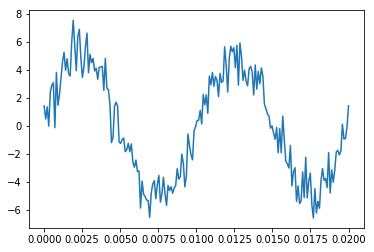

In [23]:
%pylab inline
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from __future__ import division

########### Parámetros Iniciales ###########
Fs = 10000   # Sampling Freq 10KHz
N = 200      # Samples number
t = np.linspace(0,N/Fs,num=N) # Crea una variable de tiempo desde 0, con intervalos de 1/Fs

f1 = 100   # 100Hz
A1 = 5

signal = A1 * np.sin(2*np.pi*f1*t)

noise = np.random.normal(0,1,len(signal))
sig_noise = signal + noise
plt.plot(t,sig_noise)

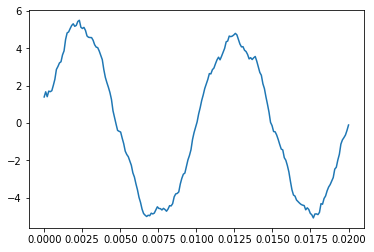

In [24]:
MVSIZE = 5

avg = np.zeros(N)
for n in range(len(sig_noise)):
    suma = 0
    d = 0
    for k in range (-(MVSIZE), MVSIZE):
        if ((n-k) > 0) and ((n-k) < (len(sig_noise))):
            suma = suma + sig_noise[(n-k)]
            d = d+1
    avg[n] = np.copy(suma/d)
plt.plot(t,avg)

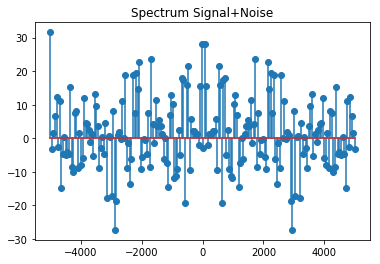

<StemContainer object of 3 artists>

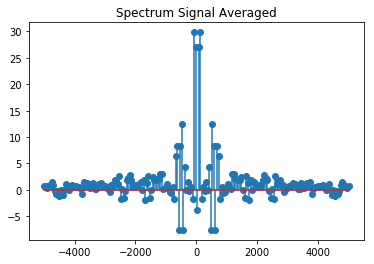

In [27]:
f = np.linspace(-Fs/2,Fs/2,N)

spec_sig_noise = np.fft.fftshift(fft(sig_noise))
spec_avg = np.fft.fftshift(fft(avg))

plt.title("Spectrum Signal+Noise")
plt.stem(f,spec_sig_noise)
plt.show()
title("Spectrum Signal Averaged")
plt.stem(f,spec_avg)